# Brain spaces

Some tests for the last part of my dissertation -- shorter version

In [42]:
import os
import numpy as np
import matplotlib.pyplot as plt

from nilearn import datasets
from nilearn import plotting
from nilearn.input_data import NiftiMapsMasker
from nilearn.connectome import ConnectivityMeasure

import numpy as np
import matplotlib.pyplot as plt

from nilearn import datasets
from nilearn import plotting
from nilearn.input_data import NiftiMapsMasker
from nilearn.connectome import ConnectivityMeasure

import numpy as np
import matplotlib.pyplot as plt
from nilearn import datasets, plotting, input_data
import nibabel as nib

In [43]:
# https://community.plotly.com/t/plotly-not-rendering-in-jupyterlab-just-leaving-an-empty-space/85588/5
import plotly.io as pio
pio.renderers.default = 'iframe'

In [44]:
aal3_atlas_filename = '/Users/mariamannone/Downloads/AAL3/AAL3v1.nii.gz'
aal3_labels_filename = '/Users/mariamannone/Downloads/AAL3/AAL3v1.nii.txt'

# Load the labels
with open(aal3_labels_filename, 'r') as f:
    roi_names = [line.strip() for line in f]
    roi_labels = [line.strip() for line in f]

In [45]:
import os
import numpy as np
import nibabel as nib
from nilearn import datasets, input_data, connectome
import matplotlib.pyplot as plt
import dicom2nifti
import dicom2nifti.settings as settings
import pydicom

In [5]:
masker = input_data.NiftiLabelsMasker(labels_img=aal3_atlas_filename, standardize=True, memory='nilearn_cache')

In [6]:
# Read matrices from different brains

In [7]:
# schizo, male, file schiz_male_test_AAL3.ipynb, COBRE dataset
# A00015518 male, 60, schizophrenia_strict
# /Users/mariamannone/Downloads/COBRE/sub-A00015518/ses-20100101/func/sub-A00015518_ses-20100101_task-rest_bold.nii.gz
# the files NIfTI were directly available, not the DICOM

In [46]:
#nifti_file_schizo = "/Users/mariamannone/Desktop/new_phd_/schizo_male.npz"
nifti_file_schizo = "/Users/mariamannone/Downloads/COBRE/sub-A00015518/ses-20100101/func/sub-A00015518_ses-20100101_task-rest_bold.nii.gz"

time_series_schizo = masker.fit_transform(nifti_file_schizo)




non_empty_rois = np.any(time_series_schizo, axis=0)
non_empty_indices = np.where(non_empty_rois)[0]

# I also remove 161 because it's not present for the patient A, AD paper -- female, AD, and 160, for the follow-up female PD
rois_to_filter_out = [160, 161, 162, 163, 164, 165, 166, 167, 168, 169]
time_series_schizo = masker.fit_transform(nifti_file_schizo)

# Filter out the specified ROIs
filtered_indices = [i for i in non_empty_indices if i not in rois_to_filter_out]

# Filter the time series to include only the selected ROIs
filtered_time_series_schizo = time_series_schizo[:, filtered_indices] # !!!

# Compute the connectivity matrix
correlation_measure_schizo= connectome.ConnectivityMeasure(kind='correlation')
connectivity_matrices_schizo = correlation_measure_schizo.fit_transform([filtered_time_series_schizo])
connectivity_matrix_schizo = connectivity_matrices_schizo[0]





#correlation_measure_schizo = connectome.ConnectivityMeasure(kind='correlation')
#correlation_matrices_schizo = correlation_measure_schizo.fit_transform([time_series_schizo])

#connectivity_matrix_schizo = correlation_matrices_schizo[0]

print(connectivity_matrix_schizo)
print(len(connectivity_matrix_schizo))

/Users/mariamannone/test2/lib/python3.10/site-packages/nilearn/maskers/nifti_labels_masker.py:805: UserWarning:

After resampling the label image to the data image, the following labels were removed: {168, 121, 134}. Label image only contains 163 labels (including background).



[[ 1.          0.90905959  0.82952571 ...  0.79314128 -0.14823678
  -0.50487778]
 [ 0.90905959  1.          0.83163601 ...  0.78774784 -0.19092095
  -0.48367815]
 [ 0.82952571  0.83163601  1.         ...  0.68604828  0.02506006
  -0.26640309]
 ...
 [ 0.79314128  0.78774784  0.68604828 ...  1.         -0.06174543
  -0.48920169]
 [-0.14823678 -0.19092095  0.02506006 ... -0.06174543  1.
   0.17976908]
 [-0.50487778 -0.48367815 -0.26640309 ... -0.48920169  0.17976908
   1.        ]]
160


In [47]:
# PD, file PPMI_AAL3_A.ipynb, male, PPMI

In [48]:
# baseline

In [49]:
nifti_file_pd_BL = "/Users/mariamannone/Desktop/new_phd_/DICOM_aal3_p2/output.nii.gz/301_rsfmri_rl.nii.gz"

time_series_pd_BL = masker.fit_transform(nifti_file_pd_BL)


non_empty_rois = np.any(time_series_pd_BL, axis=0)
non_empty_indices = np.where(non_empty_rois)[0]

# I also remove 161 because it's not present for the patient A, AD paper -- female, AD
rois_to_filter_out = [160, 161, 162, 163, 164, 165, 166, 167, 168, 169]
time_series_pd_BL = masker.fit_transform(nifti_file_pd_BL)

# Filter out the specified ROIs
filtered_indices = [i for i in non_empty_indices if i not in rois_to_filter_out]

# Filter the time series to include only the selected ROIs
filtered_time_series_pd_BL = time_series_pd_BL[:, filtered_indices] # !!!

# Compute the connectivity matrix
correlation_measure_pd_BL = connectome.ConnectivityMeasure(kind='correlation')
connectivity_matrices_pd_BL = correlation_measure_pd_BL.fit_transform([filtered_time_series_pd_BL])
connectivity_matrix_pd_BL = connectivity_matrices_pd_BL[0]





#correlation_measure_pd_BL = connectome.ConnectivityMeasure(kind='correlation')
#correlation_matrices_pd_BL = correlation_measure_pd.fit_transform([time_series_pd_BL])

#connectivity_matrix_pd_BL = correlation_matrices_pd_BL[0]

print(connectivity_matrix_pd_BL)

/Users/mariamannone/test2/lib/python3.10/site-packages/nilearn/maskers/nifti_labels_masker.py:805: UserWarning:

After resampling the label image to the data image, the following labels were removed: {170}. Label image only contains 164 labels (including background).



[[ 1.          0.8372369   0.7223145  ...  0.19722429  0.04138843
   0.00646767]
 [ 0.8372369   1.          0.69307697 ...  0.24937303  0.00624019
   0.05245663]
 [ 0.7223145   0.69307697  1.         ...  0.21357523 -0.07582867
  -0.05691824]
 ...
 [ 0.19722429  0.24937303  0.21357523 ...  1.         -0.18648289
   0.26362884]
 [ 0.04138843  0.00624019 -0.07582867 ... -0.18648289  1.
   0.4647629 ]
 [ 0.00646767  0.05245663 -0.05691824 ...  0.26362884  0.4647629
   1.        ]]


In [9]:
# follow-up

In [10]:
# later

In [11]:
# AD, male, ADNI, ADNI_AAL3_test_May_correction.ipynb

In [12]:
# baseline

In [50]:
nifti_file_AD_BL = "/Users/mariamannone/Desktop/new_phd_/DICOM_aa/output.nii.gz/501_resting_state_fmri.nii.gz"

time_series_AD_BL = masker.fit_transform(nifti_file_AD_BL)



non_empty_rois = np.any(time_series_AD_BL, axis=0)
non_empty_indices = np.where(non_empty_rois)[0]

rois_to_filter_out = [160, 161, 162, 163, 164, 165, 166, 167, 168, 169]
time_series_AD_BL = masker.fit_transform(nifti_file_AD_BL)

# Filter out the specified ROIs
filtered_indices = [i for i in non_empty_indices if i not in rois_to_filter_out]

# Filter the time series to include only the selected ROIs
filtered_time_series_AD_BL = time_series_AD_BL[:, filtered_indices] # !!!

# Compute the connectivity matrix
correlation_measure_AD_BL = connectome.ConnectivityMeasure(kind='correlation')
connectivity_matrices_AD_BL = correlation_measure_pd_BL.fit_transform([filtered_time_series_AD_BL])
connectivity_matrix_AD_BL = connectivity_matrices_AD_BL[0]







#correlation_measure_AD_BL = connectome.ConnectivityMeasure(kind='correlation')
#correlation_matrices_AD_BL = correlation_measure_pd.fit_transform([time_series_AD_BL])

#connectivity_matrix_AD_BL = correlation_matrices_AD_BL[0]

print(connectivity_matrix_AD_BL)

[[ 1.          0.5891689   0.56287771 ...  0.0597523   0.43771083
   0.17106354]
 [ 0.5891689   1.          0.62035595 ...  0.08481815  0.37006587
   0.10092617]
 [ 0.56287771  0.62035595  1.         ... -0.0377666   0.49238465
   0.19444824]
 ...
 [ 0.0597523   0.08481815 -0.0377666  ...  1.         -0.16096927
  -0.05206505]
 [ 0.43771083  0.37006587  0.49238465 ... -0.16096927  1.
   0.23870199]
 [ 0.17106354  0.10092617  0.19444824 ... -0.05206505  0.23870199
   1.        ]]


In [51]:
# follow-up

In [52]:
# later

In [53]:
# healthy, male
# for instance a control patient from PPMI, male, 74:
# dicom_folder_control = "/Users/mariamannone/Downloads/control_test4/101195/rsfMRI_LR/2021-05-17_10_47_24.0/I1496363"

In [54]:
nifti_file_healthy = "/Users/mariamannone/Desktop/new_phd_/DICOM_ccd/output.nii.gz/9_rsfmri_lr.nii.gz"


# bypassing the step of eliminating empty time series... or not??

time_series_healthy = masker.fit_transform(nifti_file_healthy)

non_empty_rois = np.any(time_series_healthy, axis=0)
non_empty_indices = np.where(non_empty_rois)[0]

rois_to_filter_out = [160, 161, 162, 163, 164, 165, 166, 167, 168, 169]
time_series_healthy = masker.fit_transform(nifti_file_healthy)

non_empty_rois_healthy = np.any(time_series_healthy, axis=0) # there should be correspondence between the two of them...
non_empty_indices_healthy = np.where(non_empty_rois_healthy)[0]

# Filter out the specified ROIs
filtered_indices = [i for i in non_empty_indices if i not in rois_to_filter_out]

# Filter the time series to include only the selected ROIs
filtered_time_series_healthy = time_series_healthy[:, filtered_indices] # !!!

# Compute the connectivity matrix
correlation_measure_healthy = connectome.ConnectivityMeasure(kind='correlation')
connectivity_matrices_healthy = correlation_measure_healthy.fit_transform([filtered_time_series_healthy])
connectivity_matrix_healthy = connectivity_matrices_healthy[0]

print(connectivity_matrix_healthy)

[[1.         0.51179204 0.59103942 ... 0.42819002 0.08182867 0.36826188]
 [0.51179204 1.         0.40255921 ... 0.33402199 0.13338108 0.20485566]
 [0.59103942 0.40255921 1.         ... 0.50354179 0.20774658 0.51730241]
 ...
 [0.42819002 0.33402199 0.50354179 ... 1.         0.14442904 0.46013333]
 [0.08182867 0.13338108 0.20774658 ... 0.14442904 1.         0.36956359]
 [0.36826188 0.20485566 0.51730241 ... 0.46013333 0.36956359 1.        ]]


/Users/mariamannone/test2/lib/python3.10/site-packages/nilearn/maskers/nifti_labels_masker.py:805: UserWarning:

After resampling the label image to the data image, the following labels were removed: {168, 133, 134, 167}. Label image only contains 163 labels (including background).



In [55]:
# what we have here so far:

connectivity_matrix_AD_BL
connectivity_matrix_healthy
connectivity_matrix_pd_BL
connectivity_matrix_schizo


print(len(connectivity_matrix_AD_BL))
print(len(connectivity_matrix_healthy))
print(len(connectivity_matrix_pd_BL))
print(len(connectivity_matrix_schizo))

160
160
160
160


In [56]:
from sklearn.manifold import MDS

In [57]:
# add more samples

In [58]:
# female AD, baseline, ADNI_AAL3_test_May_F, patient A, ADNI

In [59]:
nifti_file_AD_BL_fem = "/Users/mariamannone/Desktop/new_phd_/DICOM_bb/output.nii.gz/601_resting_state_fmri.nii.gz"

time_series_AD_BL_fem = masker.fit_transform(nifti_file_AD_BL_fem)


non_empty_rois = np.any(time_series_AD_BL_fem, axis=0)
non_empty_indices = np.where(non_empty_rois)[0]

print(non_empty_indices)

rois_to_filter_out = [160, 161, 162, 163, 164, 165, 166, 167, 168, 169]
time_series_AD_BL_fem = masker.fit_transform(nifti_file_AD_BL_fem)

# Filter out the specified ROIs
filtered_indices = [i for i in non_empty_indices if i not in rois_to_filter_out]

# Filter the time series to include only the selected ROIs
filtered_time_series_AD_BL_fem = time_series_AD_BL_fem[:, filtered_indices] # !!!

# Compute the connectivity matrix
correlation_measure_AD_BL_fem = connectome.ConnectivityMeasure(kind='correlation')
connectivity_matrices_AD_BL_fem = correlation_measure_AD_BL_fem.fit_transform([filtered_time_series_AD_BL_fem])
connectivity_matrix_AD_BL_fem = connectivity_matrices_AD_BL_fem[0]

print(connectivity_matrix_AD_BL_fem)

print(len(connectivity_matrix_AD_BL_fem))

/Users/mariamannone/test2/lib/python3.10/site-packages/nilearn/maskers/nifti_labels_masker.py:805: UserWarning:

After resampling the label image to the data image, the following labels were removed: {170}. Label image only contains 162 labels (including background).



[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160]
[[ 1.         -0.14002405  0.5533573  ...  0.36468747  0.21244119
   0.6617859 ]
 [-0.14002405  1.          0.07863657 ... -0.30658904 -0.02327459
   0.00410485]
 [ 0.5533573   0.07863657  1.         ...  0.2886345   0.3095258
   0.5120791 ]
 ...
 [ 0.36468747 -0.30658904  0.2886345  ...  1.          0.7986248
   0.7434761 ]
 [ 0.21244119 -0.02

In [23]:
# female AD, follow-up

In [60]:
nifti_file_AD_fem_FU = "/Users/mariamannone/Desktop/new_phd_/DICOM_cc/output.nii.gz/601_resting_state_fmri.nii.gz"

time_series_AD_fem_FU = masker.fit_transform(nifti_file_AD_fem_FU)


non_empty_rois = np.any(time_series_AD_fem_FU, axis=0)
non_empty_indices = np.where(non_empty_rois)[0]

print(non_empty_indices)

rois_to_filter_out = [160, 161, 162, 163, 164, 165, 166, 167, 168, 169]
time_series_AD_fem_FU = masker.fit_transform(nifti_file_AD_fem_FU)

# Filter out the specified ROIs
filtered_indices = [i for i in non_empty_indices if i not in rois_to_filter_out]

# Filter the time series to include only the selected ROIs
filtered_time_series_AD_fem_FU = time_series_AD_fem_FU[:, filtered_indices] # !!!

# Compute the connectivity matrix
correlation_measure_AD_fem_FU = connectome.ConnectivityMeasure(kind='correlation')
connectivity_matrices_AD_fem_FU = correlation_measure_AD_fem_FU.fit_transform([filtered_time_series_AD_fem_FU])
connectivity_matrix_AD_fem_FU = connectivity_matrices_AD_fem_FU[0]

print(connectivity_matrix_AD_fem_FU)

print(len(connectivity_matrix_AD_fem_FU))

/Users/mariamannone/test2/lib/python3.10/site-packages/nilearn/maskers/nifti_labels_masker.py:805: UserWarning:

After resampling the label image to the data image, the following labels were removed: {121}. Label image only contains 164 labels (including background).



[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162]
[[ 1.         -0.23140602  0.13034333 ...  0.10352743 -0.3284375
  -0.09496671]
 [-0.23140602  1.          0.01286538 ... -0.03108734  0.11002932
  -0.08790283]
 [ 0.13034333  0.01286538  1.         ... -0.03911994 -0.20573923
  -0.1508613 ]
 ...
 [ 0.10352743 -0.03108734 -0.03911994 ...  1.          0.24630284
   0.3983585 ]
 [-0.3284

In [25]:
# AD, patient C, male, file ADNI_AAL3_test_May_test_and_prediction.ipynb

In [61]:
nifti_file_AD_BL_pat_C = "/Users/mariamannone/Desktop/new_phd_/DICOM_test/output.nii.gz/801_resting_state_fmri.nii.gz"

time_series_AD_BL_pat_C = masker.fit_transform(nifti_file_AD_BL_pat_C)


non_empty_rois = np.any(time_series_AD_BL_pat_C, axis=0)
non_empty_indices = np.where(non_empty_rois)[0]

print(non_empty_indices)

rois_to_filter_out = [160, 161, 162, 163, 164, 165, 166, 167, 168, 169]
time_series_AD_BL_pat_C = masker.fit_transform(nifti_file_AD_BL_pat_C)

# Filter out the specified ROIs
filtered_indices = [i for i in non_empty_indices if i not in rois_to_filter_out]

# Filter the time series to include only the selected ROIs
filtered_time_series_AD_BL_pat_C = time_series_AD_BL_pat_C[:, filtered_indices] # !!!

# Compute the connectivity matrix
correlation_measure_AD_BL_pat_C = connectome.ConnectivityMeasure(kind='correlation')
connectivity_matrices_AD_BL_pat_C = correlation_measure_AD_BL_pat_C.fit_transform([filtered_time_series_AD_BL_pat_C])
connectivity_matrix_AD_BL_pat_C = connectivity_matrices_AD_BL_pat_C[0]

print(connectivity_matrix_AD_BL_pat_C)

print(len(connectivity_matrix_AD_BL_pat_C))

/Users/mariamannone/test2/lib/python3.10/site-packages/nilearn/maskers/nifti_labels_masker.py:805: UserWarning:

After resampling the label image to the data image, the following labels were removed: {168, 134, 167}. Label image only contains 163 labels (including background).



[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161]
[[1.         0.6671961  0.6618754  ... 0.48388433 0.32651734 0.18821831]
 [0.6671961  1.         0.50584763 ... 0.55780226 0.46365678 0.19063328]
 [0.6618754  0.50584763 1.         ... 0.5610956  0.10201811 0.15116192]
 ...
 [0.48388433 0.55780226 0.5610956  ... 1.         0.214195   0.11404492]
 [0.32651734 0.46365678 0.10201811 ... 0.2141

In [27]:
# patient C, follow-up, file ADNI_AAL3_test_May_test_and_prediction.ipynb

In [62]:
nifti_file_AD_pat_C_FU = "/Users/mariamannone/Desktop/new_phd_/DICOM_test_fu/output.nii.gz/601_resting_state_fmri.nii.gz"

time_series_AD_pat_C_FU = masker.fit_transform(nifti_file_AD_pat_C_FU)


non_empty_rois = np.any(time_series_AD_pat_C_FU, axis=0)
non_empty_indices = np.where(non_empty_rois)[0]

print(non_empty_indices)

rois_to_filter_out = [160, 161, 162, 163, 164, 165, 166, 167, 168, 169]
time_series_AD_pat_C_FU = masker.fit_transform(nifti_file_AD_pat_C_FU)

# Filter out the specified ROIs
filtered_indices = [i for i in non_empty_indices if i not in rois_to_filter_out]

# Filter the time series to include only the selected ROIs
filtered_time_series_AD_pat_C_FU = time_series_AD_pat_C_FU[:, filtered_indices] # !!!

# Compute the connectivity matrix
correlation_measure_AD_pat_C_FU = connectome.ConnectivityMeasure(kind='correlation')
connectivity_matrices_AD_pat_C_FU = correlation_measure_AD_pat_C_FU.fit_transform([filtered_time_series_AD_pat_C_FU])
connectivity_matrix_AD_pat_C_FU = connectivity_matrices_AD_pat_C_FU[0]

print(connectivity_matrix_AD_pat_C_FU)

print(len(connectivity_matrix_AD_pat_C_FU))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162]
[[1.         0.5847425  0.5660982  ... 0.32398805 0.2821798  0.40832075]
 [0.5847425  1.         0.42274213 ... 0.4241675  0.371238   0.511076  ]
 [0.5660982  0.42274213 1.         ... 0.3099269  0.11859199 0.2669369 ]
 ...
 [0.32398805 0.4241675  0.3099269  ... 1.         0.26111016 0.46274048]
 [0.2821798  0.371238   0.11859199 ... 0

In [29]:
# female PD, patient B, PPMI

In [63]:
nifti_file_pd_BL_patB = "/Users/mariamannone/Desktop/new_phd_/DICOM_aal3_p3/output.nii.gz/5_rsfmri_rl.nii.gz"

time_series_pd_BL_patB = masker.fit_transform(nifti_file_pd_BL_patB)


non_empty_rois = np.any(time_series_pd_BL_patB, axis=0)
non_empty_indices = np.where(non_empty_rois)[0]

print(non_empty_indices)

rois_to_filter_out = [160, 161, 162, 163, 164, 165, 166, 167, 168, 169]
time_series_pd_BL_patB = masker.fit_transform(nifti_file_pd_BL_patB)

# Filter out the specified ROIs
filtered_indices = [i for i in non_empty_indices if i not in rois_to_filter_out]

# Filter the time series to include only the selected ROIs
filtered_time_series_pd_BL_patB = time_series_pd_BL_patB[:, filtered_indices] # !!!

# Compute the connectivity matrix
correlation_measure_pd_BL_patB = connectome.ConnectivityMeasure(kind='correlation')
connectivity_matrices_pd_BL_patB = correlation_measure_pd_BL_patB.fit_transform([filtered_time_series_pd_BL_patB])
connectivity_matrix_pd_BL_patB = connectivity_matrices_pd_BL_patB[0]

print(connectivity_matrix_pd_BL_patB)

print(len(connectivity_matrix_pd_BL_patB))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162]
[[ 1.          0.70483731  0.87320551 ... -0.23217955  0.68172976
   0.46016625]
 [ 0.70483731  1.          0.73890268 ... -0.07766036  0.68833598
   0.4087558 ]
 [ 0.87320551  0.73890268  1.         ... -0.12521004  0.77444244
   0.56683969]
 ...
 [-0.23217955 -0.07766036 -0.12521004 ...  1.         -0.02548079
   0.07567527]
 [ 0.681

In [30]:
# female PD, patient B, PPMI, follow-up

In [64]:
nifti_file_pd_patB_FU = "/Users/mariamannone/Desktop/new_phd_/DICOM_aal3_p4/output.nii.gz/5_rsfmri_rl.nii.gz"

time_series_pd_patB_FU = masker.fit_transform(nifti_file_pd_patB_FU)


non_empty_rois = np.any(time_series_pd_patB_FU, axis=0)
non_empty_indices = np.where(non_empty_rois)[0]

print(non_empty_indices)

rois_to_filter_out = [160, 161, 162, 163, 164, 165, 166, 167, 168, 169]
time_series_pd_patB_FU = masker.fit_transform(nifti_file_pd_patB_FU)

# Filter out the specified ROIs
filtered_indices = [i for i in non_empty_indices if i not in rois_to_filter_out]

# Filter the time series to include only the selected ROIs
filtered_time_series_pd_patB_FU = time_series_pd_patB_FU[:, filtered_indices] # !!!

# Compute the connectivity matrix
correlation_measure_pd_patB_FU = connectome.ConnectivityMeasure(kind='correlation')
connectivity_matrices_pd_patB_FU = correlation_measure_pd_patB_FU.fit_transform([filtered_time_series_pd_patB_FU])
connectivity_matrix_pd_patB_FU = connectivity_matrices_pd_patB_FU[0]

print(connectivity_matrix_pd_patB_FU)

print(len(connectivity_matrix_pd_patB_FU))

/Users/mariamannone/test2/lib/python3.10/site-packages/nilearn/maskers/nifti_labels_masker.py:805: UserWarning:

After resampling the label image to the data image, the following labels were removed: {64, 133, 73, 74, 63}. Label image only contains 161 labels (including background).



[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159]
[[ 1.         -0.73182465  0.95227977 ... -0.05225115 -0.51733576
  -0.34186803]
 [-0.73182465  1.         -0.70314356 ... -0.11266496  0.34900707
   0.00576993]
 [ 0.95227977 -0.70314356  1.         ... -0.01376582 -0.50449688
  -0.41006916]
 ...
 [-0.05225115 -0.11266496 -0.01376582 ...  1.          0.15075102
   0.25475248]
 [-0.51733576  0.3490

In [65]:
# another healthy, female, ADNI_AAL3_comparison_CN_EMCI_LMCI_AD_May

In [66]:
nifti_file_healthy_F_adni = "/Users/mariamannone/Desktop/new_phd_/DICOM_CN/output.nii.gz/501_resting_state_fmri.nii.gz"


time_series_healthy_F_adni = masker.fit_transform(nifti_file_healthy_F_adni)


non_empty_rois = np.any(time_series_healthy_F_adni, axis=0)
non_empty_indices = np.where(non_empty_rois)[0]

print(non_empty_indices)

rois_to_filter_out = [160, 161, 162, 163, 164, 165, 166, 167, 168, 169]
time_series_healthy_F_adni = masker.fit_transform(nifti_file_healthy_F_adni)

# Filter out the specified ROIs
filtered_indices = [i for i in non_empty_indices if i not in rois_to_filter_out]

# Filter the time series to include only the selected ROIs
filtered_time_series_healthy_F_adni = time_series_healthy_F_adni[:, filtered_indices] # !!!

# Compute the connectivity matrix
correlation_measure_healthy_F_adni = connectome.ConnectivityMeasure(kind='correlation')
connectivity_matrices_healthy_F_adni = correlation_measure_healthy_F_adni.fit_transform([filtered_time_series_healthy_F_adni])
connectivity_matrix_healthy_F_adni = connectivity_matrices_healthy_F_adni[0]

print(connectivity_matrix_healthy_F_adni)

print(len(connectivity_matrix_healthy_F_adni))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165]
[[ 1.          0.27737275  0.6766544  ... -0.14557607  0.54929525
   0.5019373 ]
 [ 0.27737275  1.          0.3306922  ...  0.48806018  0.2553523
   0.3050698 ]
 [ 0.6766544   0.3306922   1.         ... -0.08547186  0.64594793
   0.4883016 ]
 ...
 [-0.14557607  0.48806018 -0.08547186 ...  1.          0.0020357
   0.1825638 

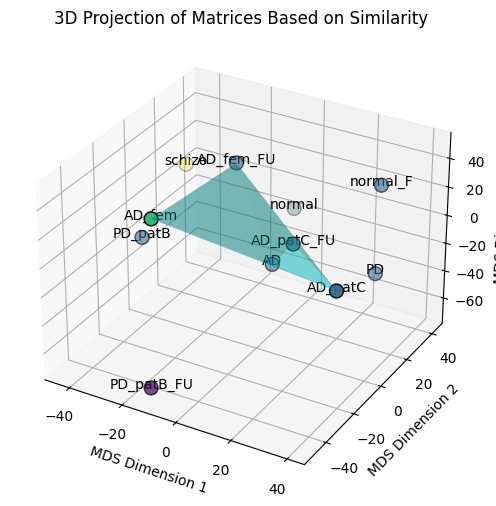

Parameters used: {'Dimensionality Reduction': 'MDS (Multidimensional Scaling)', 'Distance Metric': 'Frobenius Norm', 'Clustering': 'K-Means'}


In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
from scipy.spatial import ConvexHull

def compute_frobenius_distance(matrices):
    """Compute Frobenius norm-based distance matrix."""
    n = len(matrices)
    distance_matrix = np.zeros((n, n))
    
    for i in range(n):
        for j in range(n):
            if i != j:
                elementwise_diff = np.linalg.norm(matrices[i] - matrices[j], axis=1)
                distance_matrix[i, j] = np.linalg.norm(elementwise_diff)
    
    return distance_matrix

def cluster_matrices(distance_matrix, n_clusters=4):
    """Apply K-Means clustering."""
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(distance_matrix)
    return labels

def plot_3d_projection(distance_matrix, labels, matrix_names, selected_indices=None):
    """Project matrices into a 3D space using MDS and visualize their similarity."""
    mds = MDS(n_components=3, dissimilarity='precomputed', random_state=42)
    projected = mds.fit_transform(distance_matrix)
    
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    # Scatter plot
    scatter = ax.scatter(projected[:, 0], projected[:, 1], projected[:, 2], c=labels, cmap='viridis', edgecolors='k', s=100)
    
    for i, txt in enumerate(matrix_names):
        ax.text(projected[i, 0], projected[i, 1], projected[i, 2], txt, fontsize=10, ha='center')
    
    if selected_indices is not None:
        # Get the selected points to form the convex hull
        selected_points = projected[selected_indices]
        
        # Create a convex hull for the selected points
        hull = ConvexHull(selected_points)
        
        # Plot the shaded area inside the convex hull
        for simplex in hull.simplices:
            x = selected_points[simplex, 0]
            y = selected_points[simplex, 1]
            z = selected_points[simplex, 2]
            ax.plot_trisurf(x, y, z, color='cyan', alpha=0.3, linewidth=0)
    
    ax.set_xlabel("MDS Dimension 1")
    ax.set_ylabel("MDS Dimension 2")
    ax.set_zlabel("MDS Dimension 3")
    ax.set_title("3D Projection of Matrices Based on Similarity")
    plt.show()

# ---- Main Execution ----
matrixA = connectivity_matrix_AD_BL
matrixB = connectivity_matrix_pd_BL
matrixC = connectivity_matrix_schizo
matrixD = connectivity_matrix_healthy
matrixE = connectivity_matrix_AD_BL_fem
matrixF = connectivity_matrix_AD_BL_pat_C
matrixG = connectivity_matrix_pd_BL_patB
matrixH = connectivity_matrix_healthy_F_adni
matrixE2 = connectivity_matrix_AD_fem_FU
matrixF2 = connectivity_matrix_AD_pat_C_FU
matrixG2 = connectivity_matrix_pd_patB_FU
#matrixH = connectivity_matrix_new_pd # 11 # added on Febr 18, 2025

matrices = [matrixA, matrixB, matrixC, matrixD, matrixE, matrixF, matrixG, matrixH, matrixE2, matrixF2, matrixG2] # , matrixH
matrix_names = ["AD", "PD", "schizo", "normal", "AD_fem", "AD_patC", "PD_patB", "normal_F", "AD_fem_FU", "AD_patC_FU", "PD_patB_FU"]

distance_matrix = compute_frobenius_distance(matrices)
labels = cluster_matrices(distance_matrix)

# Specify indices of the matrices you want to highlight (e.g., matrices 1, 3, 5)
selected_indices = [0, 4, 5, 8, 9]

plot_3d_projection(distance_matrix, labels, matrix_names, selected_indices)

# Output the parameters used
parameters = {"Dimensionality Reduction": "MDS (Multidimensional Scaling)", "Distance Metric": "Frobenius Norm", "Clustering": "K-Means"}
print("Parameters used:", parameters)


In [68]:
# 9 April, without the simplex, and with the last patient as well

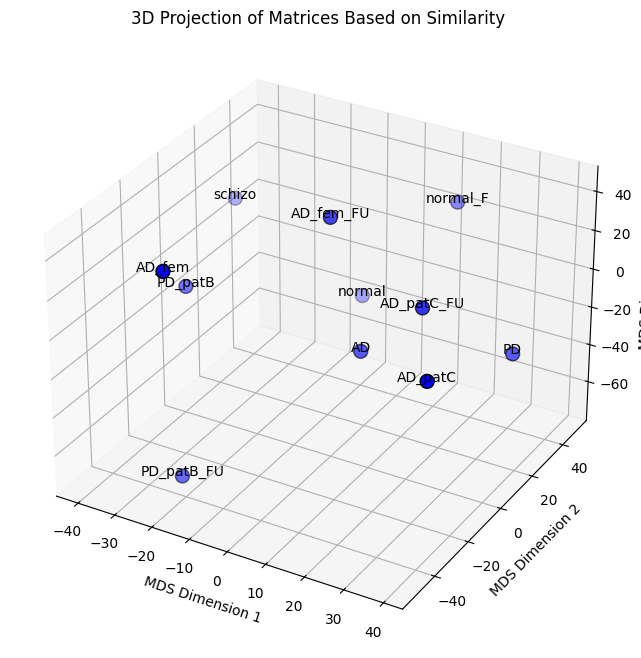

Parameters used: {'Dimensionality Reduction': 'MDS (Multidimensional Scaling)', 'Distance Metric': 'Frobenius Norm'}


In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
from scipy.spatial import ConvexHull

def compute_frobenius_distance(matrices):
    """Compute Frobenius norm-based distance matrix."""
    n = len(matrices)
    distance_matrix = np.zeros((n, n))
    
    for i in range(n):
        for j in range(n):
            if i != j:
                elementwise_diff = np.linalg.norm(matrices[i] - matrices[j], axis=1)
                distance_matrix[i, j] = np.linalg.norm(elementwise_diff)
    
    return distance_matrix

#def cluster_matrices(distance_matrix, n_clusters=4):
#    """Apply K-Means clustering."""
#    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
#    labels = kmeans.fit_predict(distance_matrix)
#    return labels

#def plot_3d_projection(distance_matrix, labels, matrix_names, selected_indices=None):
def plot_3d_projection(distance_matrix, matrix_names, selected_indices=None):
    """Project matrices into a 3D space using MDS and visualize their similarity."""
    mds = MDS(n_components=3, dissimilarity='precomputed', random_state=42) # test of August 1, 2025: Euclidean, #precomputed
    projected = mds.fit_transform(distance_matrix)
    
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Scatter plot
    scatter = ax.scatter(projected[:, 0], projected[:, 1], projected[:, 2], edgecolors='k', s=100, color='blue') # c=labels, cmap='viridis', 
    
    for i, txt in enumerate(matrix_names):
        ax.text(projected[i, 0], projected[i, 1], projected[i, 2], txt, fontsize=10, ha='center')
    
    if selected_indices is not None:
        # Get the selected points to form the convex hull
        selected_points = projected[selected_indices]
        
        # Create a convex hull for the selected points
        hull = ConvexHull(selected_points)
        
        # Plot the shaded area inside the convex hull
        for simplex in hull.simplices:
            x = selected_points[simplex, 0]
            y = selected_points[simplex, 1]
            z = selected_points[simplex, 2]
            ax.plot_trisurf(x, y, z, color='cyan', alpha=0.3, linewidth=0)
    
    ax.set_xlabel("MDS Dimension 1")
    ax.set_ylabel("MDS Dimension 2")
    ax.set_zlabel("MDS Dimension 3")
    ax.set_title("3D Projection of Matrices Based on Similarity")
    plt.show()

# ---- Main Execution ----
matrixA = connectivity_matrix_AD_BL
matrixB = connectivity_matrix_pd_BL
matrixC = connectivity_matrix_schizo
matrixD = connectivity_matrix_healthy
matrixE = connectivity_matrix_AD_BL_fem
matrixF = connectivity_matrix_AD_BL_pat_C
matrixG = connectivity_matrix_pd_BL_patB
matrixH = connectivity_matrix_healthy_F_adni
matrixE2 = connectivity_matrix_AD_fem_FU
matrixF2 = connectivity_matrix_AD_pat_C_FU
matrixG2 = connectivity_matrix_pd_patB_FU
matrixH = connectivity_matrix_new_pd # 11 # added on Febr 18, 2025

matrices = [matrixA, matrixB, matrixC, matrixD, matrixE, matrixF, matrixG, matrixH, matrixE2, matrixF2, matrixG2] # , matrixH
matrix_names = ["AD", "PD", "schizo", "normal", "AD_fem", "AD_patC", "PD_patB", "normal_F", "AD_fem_FU", "AD_patC_FU", "PD_patB_FU"]

distance_matrix = compute_frobenius_distance(matrices)
#labels = cluster_matrices(distance_matrix)

# Specify indices of the matrices you want to highlight (e.g., matrices 1, 3, 5)
#selected_indices = [0, 4, 5, 8, 9]

#plot_3d_projection(distance_matrix, labels, matrix_names, selected_indices)
#plot_3d_projection(distance_matrix, labels, matrix_names)
plot_3d_projection(distance_matrix, matrix_names)

# Output the parameters used
#parameters = {"Dimensionality Reduction": "MDS (Multidimensional Scaling)", "Distance Metric": "Frobenius Norm", "Clustering": "K-Means"}
parameters = {"Dimensionality Reduction": "MDS (Multidimensional Scaling)", "Distance Metric": "Frobenius Norm"}
print("Parameters used:", parameters)


In [72]:
# 14. April (after meeting with NM)
# different shape of markers for the matrices (same symbols for the same patient)

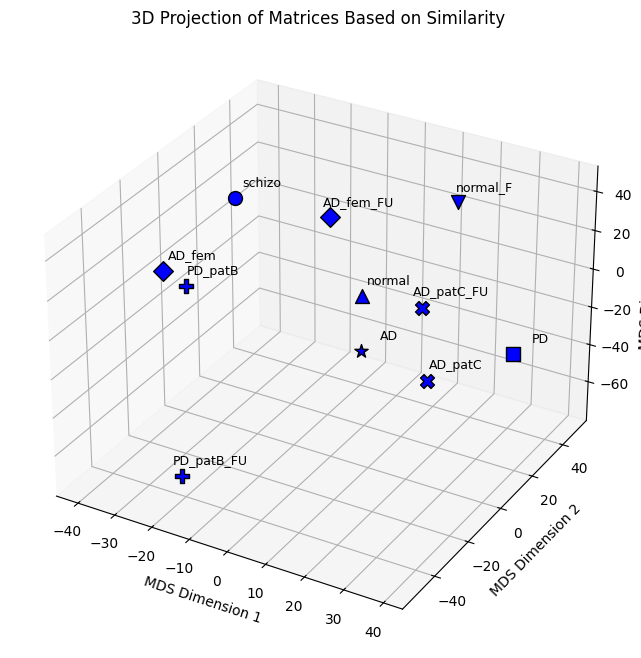

Parameters used: {'Dimensionality Reduction': 'MDS (Multidimensional Scaling)', 'Distance Metric': 'Frobenius Norm'}


In [75]:
def plot_3d_projection(distance_matrix, matrix_names, selected_indices=None):
    """Project matrices into a 3D space using MDS and visualize their similarity with custom markers."""
    mds = MDS(n_components=3, dissimilarity='precomputed', random_state=42) # test of August 1, 2025: Euclidean, #precomputed
    projected = mds.fit_transform(distance_matrix)

    # Define custom marker styles for each matrix
    marker_map = {
        "AD": "*",
        "PD": "s",
        "schizo": "o",
        "normal": "^",
        "AD_fem": "D",
        "AD_patC": "X",
        "PD_patB": "P",
        "normal_F": "v",
        "AD_fem_FU": "D",
        "AD_patC_FU": "X",
        "PD_patB_FU": "P"
    }

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot each point with its specific marker
    for i, name in enumerate(matrix_names):
        marker = marker_map.get(name, 'o')  # default to 'o' if not found
        ax.scatter(projected[i, 0], projected[i, 1], projected[i, 2],
                   marker=marker, s=100, edgecolors='k', color='blue', label=name if name not in matrix_names[:i] else "")

        #ax.text(projected[i, 0], projected[i, 1], projected[i, 2], name, fontsize=9, ha='center')

        offset = 5
        ax.text(projected[i, 0] + offset,
                projected[i, 1] + offset,
                projected[i, 2] + offset,
                name, fontsize=9, ha='center')

    if selected_indices is not None:
        selected_points = projected[selected_indices]
        hull = ConvexHull(selected_points)
        for simplex in hull.simplices:
            x = selected_points[simplex, 0]
            y = selected_points[simplex, 1]
            z = selected_points[simplex, 2]
            ax.plot_trisurf(x, y, z, color='cyan', alpha=0.3, linewidth=0)

    ax.set_xlabel("MDS Dimension 1")
    ax.set_ylabel("MDS Dimension 2")
    ax.set_zlabel("MDS Dimension 3")
    ax.set_title("3D Projection of Matrices Based on Similarity")
    plt.show()

    
    # ---- Main Execution ----
matrixA = connectivity_matrix_AD_BL
matrixB = connectivity_matrix_pd_BL
matrixC = connectivity_matrix_schizo
matrixD = connectivity_matrix_healthy
matrixE = connectivity_matrix_AD_BL_fem
matrixF = connectivity_matrix_AD_BL_pat_C
matrixG = connectivity_matrix_pd_BL_patB
matrixH = connectivity_matrix_healthy_F_adni
matrixE2 = connectivity_matrix_AD_fem_FU
matrixF2 = connectivity_matrix_AD_pat_C_FU
matrixG2 = connectivity_matrix_pd_patB_FU
matrixH = connectivity_matrix_new_pd # 11 # added on Febr 18, 2025

matrices = [matrixA, matrixB, matrixC, matrixD, matrixE, matrixF, matrixG, matrixH, matrixE2, matrixF2, matrixG2] # , matrixH
matrix_names = ["AD", "PD", "schizo", "normal", "AD_fem", "AD_patC", "PD_patB", "normal_F", "AD_fem_FU", "AD_patC_FU", "PD_patB_FU"]

distance_matrix = compute_frobenius_distance(matrices)
#labels = cluster_matrices(distance_matrix)

# Specify indices of the matrices you want to highlight (e.g., matrices 1, 3, 5)
#selected_indices = [0, 4, 5, 8, 9]

#plot_3d_projection(distance_matrix, labels, matrix_names, selected_indices)
#plot_3d_projection(distance_matrix, labels, matrix_names)
plot_3d_projection(distance_matrix, matrix_names)

# Output the parameters used
#parameters = {"Dimensionality Reduction": "MDS (Multidimensional Scaling)", "Distance Metric": "Frobenius Norm", "Clustering": "K-Means"}
parameters = {"Dimensionality Reduction": "MDS (Multidimensional Scaling)", "Distance Metric": "Frobenius Norm"}
print("Parameters used:", parameters)


In [76]:
# Add an other PD patient to build the simplex. Also a young one...

# #101050, PD, female, 50 years old, rsfMRI_RL

import os
#import torch
#from torch import nn
import numpy as np
import matplotlib.pyplot as plt
#from tqdm import tqdm

from nilearn import datasets
from nilearn import plotting
from nilearn.input_data import NiftiMapsMasker
from nilearn.connectome import ConnectivityMeasure

import numpy as np
import matplotlib.pyplot as plt
#from tqdm import tqdm

from nilearn import datasets
from nilearn import plotting
from nilearn.input_data import NiftiMapsMasker
from nilearn.connectome import ConnectivityMeasure


import numpy as np
import matplotlib.pyplot as plt
from nilearn import datasets, plotting, input_data
import nibabel as nib

# Path to your downloaded AAL3 atlas NIfTI file
aal3_atlas_filename = '/Users/mariamannone/Downloads/AAL3/AAL3v1.nii.gz'

# Path to your downloaded AAL3 labels file (e.g., CSV or TXT)
aal3_labels_filename = '/Users/mariamannone/Downloads/AAL3/AAL3v1.nii.txt'

# Load the labels
with open(aal3_labels_filename, 'r') as f:
    roi_names = [line.strip() for line in f]
    roi_labels = [line.strip() for line in f]

import os
import numpy as np
import nibabel as nib
from nilearn import datasets, input_data, connectome
import matplotlib.pyplot as plt
import dicom2nifti
import dicom2nifti.settings as settings
import pydicom


# Define the directory containing DICOM files
dicom_folder = "/Users/mariamannone/Downloads/PPMI 4/101050/rsfMRI_RL/2021-04-19_10_12_48.0/I1491225"

# Define the output folder for NIfTI files
output_folder = "/Users/mariamannone/Desktop/new_phd_/DICOM_new_PD_"

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Convert DICOM to NIfTI using dicom2nifti
dicom_files = [os.path.join(dicom_folder, file) for file in os.listdir(dicom_folder) if file.endswith(".dcm")]

# Load the DICOM data
dicom_data = [pydicom.dcmread(file) for file in dicom_files]

# Convert DICOM to NIfTI
nifti_file = os.path.join(output_folder, "output.nii.gz")
dicom2nifti.convert_directory(dicom_folder, nifti_file, compression=True, reorient=True)


In [77]:
# #101050, PD, female, 50 years old, rsfMRI_RL

nifti_file_new_pd = "/Users/mariamannone/Desktop/new_phd_/DICOM_new_PD_/output.nii.gz/8_rsfmri_rl.nii.gz"

time_series_new_pd = masker.fit_transform(nifti_file_new_pd)


non_empty_rois = np.any(time_series_new_pd, axis=0)
non_empty_indices = np.where(non_empty_rois)[0]

print(non_empty_indices)

rois_to_filter_out = [160, 161, 162, 163, 164, 165, 166, 167, 168, 169]
time_series_new_pd = masker.fit_transform(nifti_file_new_pd)

# Filter out the specified ROIs
filtered_indices = [i for i in non_empty_indices if i not in rois_to_filter_out]

# Filter the time series to include only the selected ROIs
filtered_time_series_new_pd = time_series_new_pd[:, filtered_indices] # !!!

# Compute the connectivity matrix
correlation_measure_new_pd = connectome.ConnectivityMeasure(kind='correlation')
connectivity_matrices_new_pd = correlation_measure_new_pd.fit_transform([filtered_time_series_new_pd])
connectivity_matrix_new_pd = connectivity_matrices_new_pd[0]

print(connectivity_matrix_new_pd)

print(len(connectivity_matrix_new_pd))

/Users/mariamannone/test2/lib/python3.10/site-packages/nilearn/maskers/nifti_labels_masker.py:805: UserWarning:

After resampling the label image to the data image, the following labels were removed: {133}. Label image only contains 166 labels (including background).



[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164]
[[ 1.          0.82673409  0.73267128 ...  0.25014155 -0.10004253
   0.61705537]
 [ 0.82673409  1.          0.65642553 ...  0.14334947 -0.01069083
   0.686455  ]
 [ 0.73267128  0.65642553  1.         ...  0.35885998 -0.00408007
   0.46270576]
 ...
 [ 0.25014155  0.14334947  0.35885998 ...  1.         -0.1315889
  -0.02645216]
 

In [78]:
import numpy as np
import plotly.graph_objects as go
from sklearn.manifold import MDS
from scipy.spatial import ConvexHull
import plotly.express as px

def plot_3d_projection_with_plotly(distance_matrix, labels, matrix_names, selected_indices_dict=None):
    """
    Project matrices into a 3D space using MDS and visualize their similarity using Plotly.
    
    Parameters:
    - distance_matrix: A square matrix of pairwise distances.
    - labels: Cluster labels for each matrix.
    - matrix_names: Names corresponding to each matrix.
    - selected_indices_dict: Dictionary where keys are group names and values are lists of indices for each group.
    """
    # Perform MDS to project the distance matrix into 3D space
    mds = MDS(n_components=3, dissimilarity='euclidean', random_state=42) # euclidean, # test of August 1, 2025: Euclidean, #precomputed
    projected = mds.fit_transform(distance_matrix)
    
    # Create the scatter plot
    fig = go.Figure()

    # Scatter plot for all matrices
    fig.add_trace(go.Scatter3d(
        x=projected[:, 0],
        y=projected[:, 1],
        z=projected[:, 2],
        mode='markers+text',
        text=matrix_names,
        marker=dict(color=labels, colorscale='Viridis', size=8, line=dict(color='black', width=0.5)),
        name='All Matrices'
    ))
    
    # If selected indices are provided, plot the convex hulls
    if selected_indices_dict is not None:
        # Generate distinct colors for each group
        colors = px.colors.qualitative.Alphabet
        
        for idx, (group_name, selected_indices) in enumerate(selected_indices_dict.items()):
            selected_points = projected[selected_indices]
            hull = ConvexHull(selected_points)
            
            # Extract the vertices of the convex hull
            vertices = selected_points[hull.vertices]
            
            # Create a Mesh3d plot for the convex hull
            fig.add_trace(go.Mesh3d(
                x=vertices[:, 0],
                y=vertices[:, 1],
                z=vertices[:, 2],
                color=colors[idx % len(colors)],
                opacity=0.3,
                name=f'{group_name} Hull',
                alphahull=0  # Ensures the convex hull is plotted
            ))
            
            # Optionally, add the original points for this group
            fig.add_trace(go.Scatter3d(
                x=selected_points[:, 0],
                y=selected_points[:, 1],
                z=selected_points[:, 2],
                mode='markers',
                marker=dict(size=5, color=colors[idx % len(colors)]),
                name=f'{group_name} Points'
            ))

    # Update layout
    fig.update_layout(
        scene=dict(
            xaxis_title="MDS Dimension 1",
            yaxis_title="MDS Dimension 2",
            zaxis_title="MDS Dimension 3"
        ),
        title="3D Projection of Matrices Based on Similarity"
    )

    # Show the plot
    fig.show()

# ---- Main Execution ----
matrixA = connectivity_matrix_AD_BL # 0
matrixB = connectivity_matrix_pd_BL # 1
matrixC = connectivity_matrix_schizo # 2
matrixD = connectivity_matrix_healthy # 3
matrixE = connectivity_matrix_AD_BL_fem # 4
matrixF = connectivity_matrix_AD_BL_pat_C # 5
matrixG = connectivity_matrix_pd_BL_patB # 6
matrixH = connectivity_matrix_healthy_F_adni # 7
matrixE2 = connectivity_matrix_AD_fem_FU # 8
matrixF2 = connectivity_matrix_AD_pat_C_FU # 9
matrixG2 = connectivity_matrix_pd_patB_FU # 10
matrixI = connectivity_matrix_new_pd # 11 # added on Febr 18, 2025

matrices = [matrixA, matrixB, matrixC, matrixD, matrixE, matrixF, matrixG, matrixH, matrixE2, matrixF2, matrixG2, matrixI]
matrix_names = ["AD", "PD", "schizo", "normal", "AD_fem", "AD_patC", "PD_patB", "normal_F", "AD_fem_FU", "AD_patC_FU", "PD_patB_FU", "PD_fem2"]

distance_matrix = compute_frobenius_distance(matrices)
labels = cluster_matrices(distance_matrix)

# Define groups of selected indices
selected_indices_dict = {
    'Group AD': [0, 4, 5, 8, 9],
    'Group PD': [1, 6, 10, 11]
}

# Plot the 3D projection with convex hulls
plot_3d_projection_with_plotly(distance_matrix, labels, matrix_names, selected_indices_dict)


/Users/mariamannone/test2/lib/python3.10/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



In [40]:
### 14. April

# with the same symbol for the same patients... except for one, as the number of them in 3D is limited

In [79]:
import numpy as np
import plotly.graph_objects as go
from sklearn.manifold import MDS
from scipy.spatial import ConvexHull
import plotly.express as px

def plot_3d_projection_with_plotly(distance_matrix, labels, matrix_names, selected_indices_dict=None):
    """
    Project matrices into a 3D space using MDS and visualize their similarity using Plotly.
    
    Parameters:
    - distance_matrix: A square matrix of pairwise distances.
    - labels: Cluster labels for each matrix.
    - matrix_names: Names corresponding to each matrix.
    - selected_indices_dict: Dictionary where keys are group names and values are lists of indices for each group.
    """
    # Perform MDS to project the distance matrix into 3D space
    mds = MDS(n_components=3, dissimilarity='euclidean', random_state=42) # test of August 1, 2025: Euclidean, #precomputed
    projected = mds.fit_transform(distance_matrix)

    # Map your custom marker symbols to Plotly-compatible symbols
    marker_map = {
    "AD": "diamond",
    "PD": "square",
    "schizo": "circle",
    "normal": "x",
    "AD_fem": "diamond-open",
    "AD_patC": "square-open",
    "PD_patB": "cross",
    "normal_F": "x",
    "AD_fem_FU": "diamond-open",
    "AD_patC_FU": "square-open",
    "PD_patB_FU": "cross",
    "PD_fem2": "circle-open"
}


    fig = go.Figure()

    # Fixed marker color
    marker_color = 'blue'

    # Add each matrix point with custom marker symbol and spaced label
    for i, name in enumerate(matrix_names):
        symbol = marker_map.get(name, "circle")
        fig.add_trace(go.Scatter3d(
            x=[projected[i, 0]],
            y=[projected[i, 1]],
            z=[projected[i, 2]],
            mode='markers+text',
            text=[name],
            textposition='top center',
            textfont=dict(size=10),
            marker=dict(
                symbol=symbol,
                size=8,
                color=labels[i],
                colorscale='Viridis',
                line=dict(color='black', width=0.5)
            ),
            name=name,
            showlegend=False
        ))

    # Plot convex hulls if provided
    if selected_indices_dict is not None:
        colors = px.colors.qualitative.Alphabet

        for idx, (group_name, selected_indices) in enumerate(selected_indices_dict.items()):
            selected_points = projected[selected_indices]
            hull = ConvexHull(selected_points)
            vertices = selected_points[hull.vertices]

            fig.add_trace(go.Mesh3d(
                x=vertices[:, 0],
                y=vertices[:, 1],
                z=vertices[:, 2],
                color=colors[idx % len(colors)],
                opacity=0.3,
                name=f'{group_name} Hull',
                alphahull=0
            ))

            fig.add_trace(go.Scatter3d(
                x=selected_points[:, 0],
                y=selected_points[:, 1],
                z=selected_points[:, 2],
                mode='markers',
                marker=dict(size=5, color=colors[idx % len(colors)]),
                name=f'{group_name} Points'
            ))

    # Layout tweaks
    fig.update_layout(
        scene=dict(
            xaxis_title="MDS Dimension 1",
            yaxis_title="MDS Dimension 2",
            zaxis_title="MDS Dimension 3"
        ),
        title="3D Projection of Matrices Based on Similarity"
    )

    fig.show()


# ---- Main Execution ----
matrixA = connectivity_matrix_AD_BL        # 0
matrixB = connectivity_matrix_pd_BL        # 1
matrixC = connectivity_matrix_schizo       # 2
matrixD = connectivity_matrix_healthy      # 3
matrixE = connectivity_matrix_AD_BL_fem    # 4
matrixF = connectivity_matrix_AD_BL_pat_C  # 5
matrixG = connectivity_matrix_pd_BL_patB   # 6
matrixH = connectivity_matrix_healthy_F_adni # 7
matrixE2 = connectivity_matrix_AD_fem_FU   # 8
matrixF2 = connectivity_matrix_AD_pat_C_FU # 9
matrixG2 = connectivity_matrix_pd_patB_FU  # 10
matrixI = connectivity_matrix_new_pd       # 11

matrices = [matrixA, matrixB, matrixC, matrixD, matrixE, matrixF, matrixG, matrixH, matrixE2, matrixF2, matrixG2, matrixI]
matrix_names = ["AD", "PD", "schizo", "normal", "AD_fem", "AD_patC", "PD_patB", "normal_F", "AD_fem_FU", "AD_patC_FU", "PD_patB_FU", "PD_fem2"]

distance_matrix = compute_frobenius_distance(matrices)
labels = cluster_matrices(distance_matrix)

selected_indices_dict = {
    'Group AD': [0, 4, 5, 8, 9],
    'Group PD': [1, 6, 10, 11]
}

plot_3d_projection_with_plotly(distance_matrix, labels, matrix_names, selected_indices_dict)


/Users/mariamannone/test2/lib/python3.10/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



In [80]:
import numpy as np
import plotly.graph_objects as go
from sklearn.manifold import MDS
from scipy.spatial import ConvexHull
import plotly.express as px

def plot_3d_projection_with_plotly(distance_matrix, labels, matrix_names, selected_indices_dict=None):
    """
    Project matrices into a 3D space using MDS and visualize their similarity using Plotly.
    
    Parameters:
    - distance_matrix: A square matrix of pairwise distances.
    - labels: Cluster labels for each matrix.
    - matrix_names: Names corresponding to each matrix.
    - selected_indices_dict: Dictionary where keys are group names and values are lists of indices for each group.
    """
    # Perform MDS to project the distance matrix into 3D space
    mds = MDS(n_components=3, dissimilarity='euclidean', random_state=42) # test of August 1, 2025: Euclidean, #precomputed
    projected = mds.fit_transform(distance_matrix)

    # Map your custom marker symbols to Plotly-compatible symbols
    marker_map = {
    "AD": "diamond",
    "PD": "square",
    "schizo": "circle",
    "normal": "x",
    "AD_fem": "diamond-open",
    "AD_patC": "square-open",
    "PD_patB": "cross",
    "normal_F": "x",
    "AD_fem_FU": "diamond-open",
    "AD_patC_FU": "square-open",
    "PD_patB_FU": "cross",
    "PD_fem2": "circle-open"
}


    fig = go.Figure()

    # Fixed marker color
    marker_color = 'blue'

    # Add each matrix point with custom marker symbol and spaced label
    for i, name in enumerate(matrix_names):
        symbol = marker_map.get(name, "circle")
        fig.add_trace(go.Scatter3d(
            x=[projected[i, 0]],
            y=[projected[i, 1]],
            z=[projected[i, 2]],
            mode='markers+text',
            text=[name],
            textposition='top center',
            textfont=dict(size=10),
            marker=dict(
                symbol=symbol,
                size=8,
                color=labels[i],
                colorscale='Viridis',
                line=dict(color='black', width=0.5)
            ),
            name=name,
            showlegend=False
        ))

    # Plot convex hulls if provided
    if selected_indices_dict is not None:
        colors = px.colors.qualitative.Alphabet

        for idx, (group_name, selected_indices) in enumerate(selected_indices_dict.items()):
            selected_points = projected[selected_indices]
            hull = ConvexHull(selected_points)
            vertices = selected_points[hull.vertices]

            fig.add_trace(go.Mesh3d(
                x=vertices[:, 0],
                y=vertices[:, 1],
                z=vertices[:, 2],
                color=colors[idx % len(colors)],
                opacity=0.3,
                name=f'{group_name} Hull',
                alphahull=0
            ))

            fig.add_trace(go.Scatter3d(
                x=selected_points[:, 0],
                y=selected_points[:, 1],
                z=selected_points[:, 2],
                mode='markers',
                marker=dict(size=5, color=colors[idx % len(colors)]),
                name=f'{group_name} Points'
            ))

    fig.update_layout(
    scene=dict(
        xaxis_title="MDS Dimension 1",
        yaxis_title="MDS Dimension 2",
        zaxis_title="MDS Dimension 3",
        xaxis=dict(range=[projected[:, 0].min() - 10, projected[:, 0].max() + 10]),
        yaxis=dict(range=[projected[:, 1].min() - 10, projected[:, 1].max() + 10]),
        zaxis=dict(range=[projected[:, 2].min() - 10, projected[:, 2].max() + 10]),
    ),
    width=1000,
    height=1000,
    margin=dict(l=50, r=50, b=50, t=50),
    scene_camera=dict(
        eye=dict(x=1.8, y=1.8, z=1.8)  # Controls the camera zoom & angle
    ),
    title="3D Projection of Matrices Based on Similarity"
)


    fig.show()


# ---- Main Execution ----
matrixA = connectivity_matrix_AD_BL        # 0
matrixB = connectivity_matrix_pd_BL        # 1
matrixC = connectivity_matrix_schizo       # 2
matrixD = connectivity_matrix_healthy      # 3
matrixE = connectivity_matrix_AD_BL_fem    # 4
matrixF = connectivity_matrix_AD_BL_pat_C  # 5
matrixG = connectivity_matrix_pd_BL_patB   # 6
matrixH = connectivity_matrix_healthy_F_adni # 7
matrixE2 = connectivity_matrix_AD_fem_FU   # 8
matrixF2 = connectivity_matrix_AD_pat_C_FU # 9
matrixG2 = connectivity_matrix_pd_patB_FU  # 10
matrixI = connectivity_matrix_new_pd       # 11

matrices = [matrixA, matrixB, matrixC, matrixD, matrixE, matrixF, matrixG, matrixH, matrixE2, matrixF2, matrixG2, matrixI]
matrix_names = ["AD", "PD", "schizo", "normal", "AD_fem", "AD_patC", "PD_patB", "normal_F", "AD_fem_FU", "AD_patC_FU", "PD_patB_FU", "PD_fem2"]

distance_matrix = compute_frobenius_distance(matrices)
labels = cluster_matrices(distance_matrix)

selected_indices_dict = {
    'Group AD': [0, 4, 5, 8, 9],
    'Group PD': [1, 6, 10, 11]
}

plot_3d_projection_with_plotly(distance_matrix, labels, matrix_names, selected_indices_dict)


/Users/mariamannone/test2/lib/python3.10/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



In [81]:
#####

# first version, 1 simplex

#####

import numpy as np
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
from scipy.spatial import ConvexHull

def plot_3d_projection_with_plotly(distance_matrix, labels, matrix_names, selected_indices=None):
    """Project matrices into a 3D space using MDS and visualize their similarity using Plotly."""
    mds = MDS(n_components=3, dissimilarity='precomputed', random_state=42)
    projected = mds.fit_transform(distance_matrix)
    
    # Create the scatter plot
    fig = go.Figure()

    # Scatter plot for the matrices
    fig.add_trace(go.Scatter3d(
        x=projected[:, 0],
        y=projected[:, 1],
        z=projected[:, 2],
        mode='markers+text',
        text=matrix_names,
        marker=dict(color=labels, colorscale='Viridis', size=8, line=dict(color='black', width=0.5))
    ))
    
    # If selected indices are provided, shade the convex hull
    if selected_indices is not None:
        selected_points = projected[selected_indices]
        hull = ConvexHull(selected_points)
        
        # Create the shaded area inside the convex hull
        for simplex in hull.simplices:
            fig.add_trace(go.Mesh3d(
                x=selected_points[simplex, 0],
                y=selected_points[simplex, 1],
                z=selected_points[simplex, 2],
                color='cyan', opacity=0.3
            ))
    
    fig.update_layout(
        scene=dict(
            xaxis_title="MDS Dimension 1",
            yaxis_title="MDS Dimension 2",
            zaxis_title="MDS Dimension 3"
        ),
        title="3D Projection of Matrices Based on Similarity"
    )
    
    fig.show()

# ---- Main Execution ----
matrixA = connectivity_matrix_AD_BL
matrixB = connectivity_matrix_pd_BL
matrixC = connectivity_matrix_schizo
matrixD = connectivity_matrix_healthy
matrixE = connectivity_matrix_AD_BL_fem
matrixF = connectivity_matrix_AD_BL_pat_C
matrixG = connectivity_matrix_pd_BL_patB
matrixH = connectivity_matrix_healthy_F_adni
matrixE2 = connectivity_matrix_AD_fem_FU
matrixF2 = connectivity_matrix_AD_pat_C_FU
matrixG2 = connectivity_matrix_pd_patB_FU

matrices = [matrixA, matrixB, matrixC, matrixD, matrixE, matrixF, matrixG, matrixH, matrixE2, matrixF2, matrixG2]
matrix_names = ["AD", "PD", "schizo", "normal", "AD_fem", "AD_patC", "PD_patB", "normal_F", "AD_fem_FU", "AD_patC_FU", "PD_patB_FU"]

distance_matrix = compute_frobenius_distance(matrices)
labels = cluster_matrices(distance_matrix)

# Specify indices of the matrices you want to highlight (e.g., matrices 1, 3, 5)
selected_indices = [0, 4, 5, 8, 9]

plot_3d_projection_with_plotly(distance_matrix, labels, matrix_names, selected_indices)

# Output the parameters used
parameters = {"Dimensionality Reduction": "MDS (Multidimensional Scaling)", "Distance Metric": "Frobenius Norm", "Clustering": "K-Means"}
print("Parameters used:", parameters)


Parameters used: {'Dimensionality Reduction': 'MDS (Multidimensional Scaling)', 'Distance Metric': 'Frobenius Norm', 'Clustering': 'K-Means'}


In [82]:
#####

# TEST 

# solution from https://community.plotly.com/t/plotly-not-rendering-in-jupyterlab-just-leaving-an-empty-space/85588/5
import plotly.io as pio
pio.renderers.default = 'iframe'

#####

import numpy as np
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
from scipy.spatial import ConvexHull

def plot_3d_projection_with_plotly(distance_matrix, labels, matrix_names, selected_indices=None):
    """Project matrices into a 3D space using MDS and visualize their similarity using Plotly."""
    mds = MDS(n_components=3, dissimilarity='precomputed', random_state=42)
    projected = mds.fit_transform(distance_matrix)
    
    # Create the scatter plot
    fig = go.Figure()

    # Scatter plot for the matrices
    fig.add_trace(go.Scatter3d(
        x=projected[:, 0],
        y=projected[:, 1],
        z=projected[:, 2],
        mode='markers+text',
        text=matrix_names,
        marker=dict(color=labels, colorscale='Viridis', size=8, line=dict(color='black', width=0.5))
    ))
    
    # If selected indices are provided, shade the convex hull
    if selected_indices is not None:
        selected_points = projected[selected_indices]
        hull = ConvexHull(selected_points)
        
        # Create the shaded area inside the convex hull
        for simplex in hull.simplices:
            fig.add_trace(go.Mesh3d(
                x=selected_points[simplex, 0],
                y=selected_points[simplex, 1],
                z=selected_points[simplex, 2],
                color='cyan', opacity=0.3
            ))
    
    fig.update_layout(
        scene=dict(
            xaxis_title="MDS Dimension 1",
            yaxis_title="MDS Dimension 2",
            zaxis_title="MDS Dimension 3"
        ),
        title="3D Projection of Matrices Based on Similarity"
    )
    
    fig.show()

# ---- Main Execution ----
matrixA = connectivity_matrix_AD_BL
matrixB = connectivity_matrix_pd_BL
matrixC = connectivity_matrix_schizo
matrixD = connectivity_matrix_healthy
matrixE = connectivity_matrix_AD_BL_fem
matrixF = connectivity_matrix_AD_BL_pat_C
matrixG = connectivity_matrix_pd_BL_patB
matrixH = connectivity_matrix_healthy_F_adni
matrixE2 = connectivity_matrix_AD_fem_FU
matrixF2 = connectivity_matrix_AD_pat_C_FU
matrixG2 = connectivity_matrix_pd_patB_FU

matrices = [matrixA, matrixB, matrixC, matrixD, matrixE, matrixF, matrixG, matrixH, matrixE2, matrixF2, matrixG2]
matrix_names = ["AD", "PD", "schizo", "normal", "AD_fem", "AD_patC", "PD_patB", "normal_F", "AD_fem_FU", "AD_patC_FU", "PD_patB_FU"]

distance_matrix = compute_frobenius_distance(matrices)
labels = cluster_matrices(distance_matrix)

# Specify indices of the matrices you want to highlight (e.g., matrices 1, 3, 5)
selected_indices = [0, 4, 5, 8, 9]

plot_3d_projection_with_plotly(distance_matrix, labels, matrix_names, selected_indices)

# Output the parameters used
parameters = {"Dimensionality Reduction": "MDS (Multidimensional Scaling)", "Distance Metric": "Frobenius Norm", "Clustering": "K-Means"}
print("Parameters used:", parameters)


Parameters used: {'Dimensionality Reduction': 'MDS (Multidimensional Scaling)', 'Distance Metric': 'Frobenius Norm', 'Clustering': 'K-Means'}


In [47]:
# April 9, only points, without symplexes

In [83]:
#####

# TEST 

# solution from https://community.plotly.com/t/plotly-not-rendering-in-jupyterlab-just-leaving-an-empty-space/85588/5
import plotly.io as pio
pio.renderers.default = 'iframe'

#####

import numpy as np
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
from scipy.spatial import ConvexHull

def plot_3d_projection_with_plotly(distance_matrix, labels, matrix_names, selected_indices=None):
    """Project matrices into a 3D space using MDS and visualize their similarity using Plotly."""
    mds = MDS(n_components=3, dissimilarity='precomputed', random_state=42)
    projected = mds.fit_transform(distance_matrix)
    
    # Create the scatter plot
    fig = go.Figure()

    # Scatter plot for the matrices
    fig.add_trace(go.Scatter3d(
        x=projected[:, 0],
        y=projected[:, 1],
        z=projected[:, 2],
        mode='markers+text',
        text=matrix_names,
        marker=dict(color=labels, colorscale='Viridis', size=8, line=dict(color='black', width=0.5))
    ))
    
    # If selected indices are provided, shade the convex hull
    if selected_indices is not None:
        selected_points = projected[selected_indices]
        hull = ConvexHull(selected_points)
        
        # Create the shaded area inside the convex hull
        for simplex in hull.simplices:
            fig.add_trace(go.Mesh3d(
                x=selected_points[simplex, 0],
                y=selected_points[simplex, 1],
                z=selected_points[simplex, 2],
                color='cyan', opacity=0.3
            ))
    
    fig.update_layout(
        scene=dict(
            xaxis_title="MDS Dimension 1",
            yaxis_title="MDS Dimension 2",
            zaxis_title="MDS Dimension 3"
        ),
        title="3D Projection of Matrices Based on Similarity"
    )
    
    fig.show()

# ---- Main Execution ----
matrixA = connectivity_matrix_AD_BL
matrixB = connectivity_matrix_pd_BL
matrixC = connectivity_matrix_schizo
matrixD = connectivity_matrix_healthy
matrixE = connectivity_matrix_AD_BL_fem
matrixF = connectivity_matrix_AD_BL_pat_C
matrixG = connectivity_matrix_pd_BL_patB
matrixH = connectivity_matrix_healthy_F_adni
matrixE2 = connectivity_matrix_AD_fem_FU
matrixF2 = connectivity_matrix_AD_pat_C_FU
matrixG2 = connectivity_matrix_pd_patB_FU

matrices = [matrixA, matrixB, matrixC, matrixD, matrixE, matrixF, matrixG, matrixH, matrixE2, matrixF2, matrixG2]
matrix_names = ["AD", "PD", "schizo", "normal", "AD_fem", "AD_patC", "PD_patB", "normal_F", "AD_fem_FU", "AD_patC_FU", "PD_patB_FU"]

distance_matrix = compute_frobenius_distance(matrices)
labels = cluster_matrices(distance_matrix)

# Specify indices of the matrices you want to highlight (e.g., matrices 1, 3, 5)
#selected_indices = [0, 4, 5, 8, 9]

#plot_3d_projection_with_plotly(distance_matrix, labels, matrix_names, selected_indices)
plot_3d_projection_with_plotly(distance_matrix, labels, matrix_names)

# Output the parameters used
parameters = {"Dimensionality Reduction": "MDS (Multidimensional Scaling)", "Distance Metric": "Frobenius Norm", "Clustering": "K-Means"}
print("Parameters used:", parameters)


Parameters used: {'Dimensionality Reduction': 'MDS (Multidimensional Scaling)', 'Distance Metric': 'Frobenius Norm', 'Clustering': 'K-Means'}


In [49]:
# I want to check the relationship between axes in MDS and the original labeling of the matrices

In [50]:
import numpy as np
import pandas as pd
from sklearn.manifold import MDS
from scipy.stats import pearsonr

def analyze_mds_feature_correlation(matrices, distance_matrix):
    """Relate MDS coordinates to original matrix features."""
    mds = MDS(n_components=3, dissimilarity='euclidean', random_state=42) # precomputed
    projected = mds.fit_transform(distance_matrix)  # MDS coordinates

    # Convert matrices to a feature matrix (e.g., flatten or take means of rows)
    feature_matrix = np.array([mat.mean(axis=1) for mat in matrices])  # Example: row-wise mean

    # Compute correlations between features and MDS coordinates
    correlation_results = {}
    for dim in range(3):
        correlations = [pearsonr(feature_matrix[:, i], projected[:, dim])[0] for i in range(feature_matrix.shape[1])]
        correlation_results[f"MDS Dimension {dim+1}"] = correlations
    
    # Convert to a DataFrame for better visualization
    correlation_df = pd.DataFrame(correlation_results, index=[f"ROI {i+1}" for i in range(feature_matrix.shape[1])])
    return correlation_df

# Example usage
correlation_df = analyze_mds_feature_correlation(matrices, distance_matrix)
print(correlation_df)

# Save the correlation results to a CSV file
correlation_df.to_csv("mds_feature_correlations.csv", index=True)



/Users/mariamannone/test2/lib/python3.10/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



         MDS Dimension 1  MDS Dimension 2  MDS Dimension 3
ROI 1           0.527627         0.374880        -0.313281
ROI 2           0.685291         0.790540         0.339114
ROI 3           0.180949         0.420239        -0.386016
ROI 4           0.483956         0.792298         0.004185
ROI 5           0.257962         0.438076        -0.355543
...                  ...              ...              ...
ROI 156         0.061286        -0.256044         0.019517
ROI 157         0.148580        -0.043065         0.014311
ROI 158         0.144450        -0.055105         0.413674
ROI 159         0.369795         0.659799         0.627691
ROI 160         0.284333         0.686683         0.475873

[160 rows x 3 columns]


In [51]:
# finding the most impactful ones:

In [52]:
# Sort and display all ROIs for each MDS dimension
for col in correlation_df.columns:
    # Sort ROIs by absolute correlation for the current MDS dimension
    sorted_table = correlation_df[[col]].reindex(correlation_df[col].abs().sort_values(ascending=False).index)

    # Save the sorted table as a CSV file
    filename = f"sorted_{col.replace(' ', '_').lower()}.csv"
    sorted_table.to_csv(filename)

    # Print the sorted table
    print(f"\n🔹 Sorted ROI Correlations for {col} 🔹")
    print(sorted_table.to_string(float_format="%.3f"))  # Ensures all values are printed with 3 decimals

print("\n✅ Sorted correlation tables (with ALL ROIs) saved as separate CSV files.")



🔹 Sorted ROI Correlations for MDS Dimension 1 🔹
         MDS Dimension 1
ROI 60             0.702
ROI 72             0.696
ROI 66             0.688
ROI 2              0.685
ROI 140            0.680
ROI 130            0.673
ROI 147           -0.629
ROI 124            0.615
ROI 44             0.593
ROI 36             0.577
ROI 64             0.563
ROI 37             0.563
ROI 71             0.556
ROI 131            0.535
ROI 1              0.528
ROI 129           -0.525
ROI 30            -0.508
ROI 134            0.500
ROI 78             0.495
ROI 4              0.484
ROI 93             0.477
ROI 155            0.477
ROI 62             0.469
ROI 132            0.466
ROI 16             0.460
ROI 80             0.455
ROI 35             0.442
ROI 123            0.425
ROI 27             0.423
ROI 46             0.416
ROI 50             0.411
ROI 25             0.409
ROI 70             0.407
ROI 59             0.403
ROI 150            0.400
ROI 135            0.399
ROI 17            -0.397
R

In [53]:
# Upon Kurths' suggestion


# matrixG, matrixG2

#point 1: PD, patient B baseline: coordinates (x1, y1, z1);
#point 2: PD, patient B follow-up: coordinates (x2, y2, z2)


#print these coordinates, for each point

#considering the first five ROIs more impacting each axis, compute the percentage of alteration from the first point to the second point, for each coordinate, for each of the five ROIs

#this quantitatively provides an example of a ``path'' described by K between two time points


patB_coordinates = np.array([-34.25, -15.81, -3.611])
print(patB_coordinates)

patB_FU_coordinates = np.array([-13.48, -47.21, -69.99])
print(patB_FU_coordinates)

import numpy as np

# Coordinates for points (patB and patB_FU)
patB_coordinates = np.array([-34.25, -15.81, -3.611])  # Point 1 (patB)
patB_FU_coordinates = np.array([-13.48, -47.21, -69.99])  # Point 2 (patB_FU)

# Function to compute the percentage change
def compute_percentage_change(old_value, new_value):
    return abs(new_value - old_value) / abs(old_value) * 100

# Step 1: Calculate the percentage change for each coordinate
percentage_changes = {}
for i, (old_value, new_value) in enumerate(zip(patB_coordinates, patB_FU_coordinates)):
    percentage_changes[f"MDS Dimension {i + 1}"] = compute_percentage_change(old_value, new_value)

# Step 2: Print the results
print("🔹 Percentage Change from patB_coordinates to patB_FU_coordinates 🔹")
for dimension, change in percentage_changes.items():
    print(f"{dimension}: {change:.2f}%")

[-34.25  -15.81   -3.611]
[-13.48 -47.21 -69.99]
🔹 Percentage Change from patB_coordinates to patB_FU_coordinates 🔹
MDS Dimension 1: 60.64%
MDS Dimension 2: 198.61%
MDS Dimension 3: 1838.24%


In [54]:
# Addition of 30 June, at the review step

In [55]:
# chat -- We can identify the ROI pairs with the highest variance across all matrices,
# indicating high discriminatory potential.

In [56]:
import numpy as np
import pandas as pd

# Stack all matrices into a 3D array: shape (n_matrices, n_rois, n_rois)
mat_array = np.stack(matrices)  # shape: (12, N, N)

# Flatten upper triangle (excluding diagonal) of each matrix
n_matrices, n_rois, _ = mat_array.shape
triu_indices = np.triu_indices(n_rois, k=1)
flattened = mat_array[:, triu_indices[0], triu_indices[1]]  # shape: (12, n_pairs)

# Compute variance across matrices for each ROI pair
pair_variances = np.var(flattened, axis=0)

# Sort ROI pairs by variance
top_n = 20
top_pair_indices = np.argsort(pair_variances)[-top_n:][::-1]

# Map indices back to ROI name pairs
roi_names = list(correlation_df.index)  # assuming correlation_df is ROI x MDS columns
top_pairs = [(roi_names[i], roi_names[j]) for i, j in zip(triu_indices[0][top_pair_indices], triu_indices[1][top_pair_indices])]

# Save for later comparison
top_pairs_df = pd.DataFrame(top_pairs, columns=['ROI 1', 'ROI 2'])
top_pairs_df['Variance'] = pair_variances[top_pair_indices]
top_pairs_df.to_csv("top_discriminating_roi_pairs.csv", index=False)

print("\n✅ Top discriminating ROI pairs saved to CSV.")
print(top_pairs_df)



✅ Top discriminating ROI pairs saved to CSV.
      ROI 1    ROI 2  Variance
0   ROI 115  ROI 116  0.332268
1    ROI 74   ROI 78  0.328301
2   ROI 114  ROI 116  0.323776
3    ROI 46   ROI 70  0.313540
4   ROI 104  ROI 115  0.303893
5    ROI 49   ROI 70  0.302827
6   ROI 113  ROI 116  0.302197
7   ROI 106  ROI 115  0.296282
8    ROI 98  ROI 116  0.293595
9    ROI 57   ROI 86  0.293479
10   ROI 45   ROI 70  0.290631
11   ROI 61   ROI 99  0.290308
12  ROI 100  ROI 116  0.290150
13  ROI 105  ROI 116  0.287509
14  ROI 151  ROI 152  0.285509
15  ROI 104  ROI 116  0.283682
16   ROI 99  ROI 115  0.283401
17   ROI 61  ROI 106  0.279704
18   ROI 57  ROI 115  0.278589
19   ROI 46   ROI 61  0.278352


In [57]:
# Then: comparison with the most influential individual ROIs from MDS

In [63]:
# Extract top individual ROIs per MDS dimension
top_individual_rois = set()
top_k = 10  # adjust as needed

for col in correlation_df.columns:
    top_individual_rois.update(
        correlation_df[col].abs().sort_values(ascending=False).head(top_k).index
    )

# Check which top pairs involve any top individual ROIs
top_pairs_df['Involves_Top_ROI'] = top_pairs_df.apply(
    lambda row: row['ROI 1'] in top_individual_rois or row['ROI 2'] in top_individual_rois,
    axis=1
)

# Display matches
print("\n ROI pairs involving high-influence ROIs:")
print(top_pairs_df[top_pairs_df['Involves_Top_ROI']])


 ROI pairs involving high-influence ROIs:
      ROI 1    ROI 2  Variance  Involves_Top_ROI
3    ROI 46   ROI 70  0.313540              True
5    ROI 49   ROI 70  0.302827              True
7   ROI 106  ROI 115  0.296282              True
10   ROI 45   ROI 70  0.290631              True
11   ROI 61   ROI 99  0.290308              True
16   ROI 99  ROI 115  0.283401              True
17   ROI 61  ROI 106  0.279704              True


In [64]:
import networkx as nx
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# --- Parameters ---
top_k = 20  # Top ROIs from correlation_df per MDS dimension
top_n_pairs = 20  # Top ROI pairs by variance

# --- 1. Prepare ROI pair graph ---
roi_names = list(correlation_df.index)
n_rois = len(roi_names)

# Stack matrices and get upper triangle
#mat_array = np.stack(matrices)
#triu_indices = np.triu_indices(n_rois, k=1)
#flattened = mat_array[:, triu_indices[0], triu_indices[1]]
#pair_variances = np.var(flattened, axis=0)

# Select top pairs
#top_pair_indices = np.argsort(pair_variances)[-top_n_pairs:]
#roi_pairs = [(roi_names[i], roi_names[j]) for i, j in zip(triu_indices[0][top_pair_indices], triu_indices[1][top_pair_indices])]
#pair_var_values = pair_variances[top_pair_indices]

# Create graph
#G = nx.Graph()
#for (roi1, roi2), var in zip(roi_pairs, pair_var_values):
#    G.add_edge(roi1, roi2, weight=var)

# Get top individual ROIs (from correlation_df)
#top_rois_set = set()
#for col in correlation_df.columns:
#    top_rois_set.update(correlation_df[col].abs().sort_values(ascending=False).head(top_k).index)

# Layout for network plot
#pos = nx.spring_layout(G, seed=42, k=0.6)

# Node attributes
#node_x, node_y, node_text, node_color = [], [], [], []
#for node in G.nodes:
#    x, y = pos[node]
#    node_x.append(x)
#    node_y.append(y)
#    node_text.append(node)
#    node_color.append('crimson' if node in top_rois_set else 'lightgray')

# Edge attributes
#edge_x, edge_y = [], []
#for u, v in G.edges:
#   x0, y0 = pos[u]
#    x1, y1 = pos[v]
#    edge_x += [x0, x1, None]
#    edge_y += [y0, y1, None]

# --- 2. Prepare bar plot from correlation_df ---
#bar_data = []
#colors = ['#636EFA', '#EF553B', '#00CC96']
#for i, col in enumerate(correlation_df.columns):
#    top_corrs = correlation_df[col].abs().sort_values(ascending=False).head(top_k)
#    bar_data.append(go.Bar(
#        x=top_corrs.values,
#        y=top_corrs.index,
#        orientation='h',
#        name=col,
#        marker_color=colors[i]
#    ))

# --- 3. Combine in a dual subplot ---
#fig = make_subplots(rows=1, cols=2, subplot_titles=("Top Discriminative ROI Pairs", "Top Individual ROIs per MDS Dimension"),
#                   column_widths=[0.55, 0.45])

# Left panel: ROI pair network
#fig.add_trace(go.Scatter(
#    x=edge_x, y=edge_y, mode='lines',
#    line=dict(color='gray', width=1),
#    hoverinfo='none'
#), row=1, col=1)

#fig.add_trace(go.Scatter(
#    x=node_x, y=node_y, mode='markers+text',
#    marker=dict(size=14, color=node_color, line=dict(color='black', width=0.8)),
#    text=node_text, textposition="top center"
#), row=1, col=1)

# Right panel: bar plots
#for trace in bar_data:
#    fig.add_trace(trace, row=1, col=2)

#fig.update_layout(
#    height=800, width=1200,
#    title_text="Comparison of Influential ROI Pairs and Individual ROIs",
#    showlegend=True,
#    template='plotly_white',
#    margin=dict(t=80)
#)

#fig.update_yaxes(autorange="reversed", row=1, col=2)  # horizontal bar
#fig.show()


In [65]:
######
# concerning the path of K
######

# we can  relate the larger MDS shifts
# to the ROI pairs that most influence each MDS axis.

In [66]:
import numpy as np
import pandas as pd

# Input coordinates from MDS
patB_coordinates = np.array([-34.25, -15.81, -3.611])
patB_FU_coordinates = np.array([-13.48, -47.21, -69.99])
mds_delta = patB_FU_coordinates - patB_coordinates

# Compute % change for each MDS axis
def compute_percentage_change(old_value, new_value):
    return abs(new_value - old_value) / abs(old_value) * 100

percentage_changes = {
    f"MDS Dimension {i+1}": compute_percentage_change(old, new)
    for i, (old, new) in enumerate(zip(patB_coordinates, patB_FU_coordinates))
}

# Triangular indices for vectorizing upper triangle of matrix
n_rois = connectivity_matrix_pd_BL_patB.shape[0]
triu_idx = np.triu_indices(n_rois, k=1)
roi_pairs = [f"{roi_names[i]} - {roi_names[j]}" for i, j in zip(*triu_idx)]

# Flattened connectivity values
vec_patB     = connectivity_matrix_pd_BL_patB[triu_idx]
vec_patB_FU  = connectivity_matrix_pd_patB_FU[triu_idx]
vec_diff     = vec_patB_FU - vec_patB

# Normalize MDS delta to unit vector
mds_unit = mds_delta / np.linalg.norm(mds_delta)



# Compute contribution of each ROI pair to each MDS axis
contributions = []
for dim in range(3):
    for i, label in enumerate(roi_pairs):
        contrib = vec_diff[i] * mds_unit[dim]
        contributions.append({
            "ROI Pair": label,
            "Axis": f"MDS Dimension {dim + 1}",
            "Connectivity Δ": vec_diff[i],
            "Axis Δ": mds_delta[dim],
            "Estimated Contribution": contrib
        })

df_contrib = pd.DataFrame(contributions)

# Determine most impacted axis
dominant_axis = max(percentage_changes, key=percentage_changes.get)
print(f"\n Dominant Axis: {dominant_axis} (Δ = {percentage_changes[dominant_axis]:.2f}%)")

# Show top contributors for that axis
top = df_contrib[df_contrib["Axis"] == dominant_axis].copy()
top["Abs Contribution"] = top["Estimated Contribution"].abs()
top.sort_values("Abs Contribution", ascending=False, inplace=True)

print(f"\n Top ROI Pair Contributors to {dominant_axis} from patB to patB_FU:")
#print(top[["ROI Pair", "Connectivity Δ", "Axis Δ", "Estimated Contribution"]].head(10).to_string(index=False, float_format="%.4f"))
print(top[["ROI Pair", "Connectivity Δ", "Axis Δ", "Estimated Contribution"]].head(50).to_string(index=False, float_format="%.4f"))





dominant_axis = max(percentage_changes, key=percentage_changes.get)
print(f"\n Dominant Axis: {dominant_axis} (Δ = {percentage_changes[dominant_axis]:.2f}%)")

# Show top contributors for that axis
top = df_contrib[df_contrib["Axis"] == dominant_axis].copy()
top["Abs Contribution"] = top["Estimated Contribution"].abs()
top.sort_values("Abs Contribution", ascending=False, inplace=True)


# Show top contributors for that axis
top = df_contrib[df_contrib["Axis"] == dominant_axis].copy()
top["Abs Contribution"] = top["Estimated Contribution"].abs()
top.sort_values("Abs Contribution", ascending=False, inplace=True)

# Extract top N contributors (e.g. top 10)
#top_n = 10

top_n = 50
top_rois = top.head(top_n)


 Dominant Axis: MDS Dimension 3 (Δ = 1838.24%)

 Top ROI Pair Contributors to MDS Dimension 3 from patB to patB_FU:
        ROI Pair  Connectivity Δ   Axis Δ  Estimated Contribution
 ROI 15 - ROI 87          1.7811 -66.3790                 -1.5492
   ROI 5 - ROI 6         -1.7652 -66.3790                  1.5354
 ROI 27 - ROI 87         -1.7445 -66.3790                  1.5174
   ROI 3 - ROI 6         -1.7368 -66.3790                  1.5107
  ROI 6 - ROI 35         -1.7120 -66.3790                  1.4892
  ROI 1 - ROI 87          1.7066 -66.3790                 -1.4845
  ROI 6 - ROI 37         -1.7062 -66.3790                  1.4841
 ROI 84 - ROI 87         -1.7047 -66.3790                  1.4828
 ROI 35 - ROI 87          1.7030 -66.3790                 -1.4813
 ROI 37 - ROI 70         -1.6987 -66.3790                  1.4776
  ROI 6 - ROI 15         -1.6961 -66.3790                  1.4753
 ROI 38 - ROI 70         -1.6943 -66.3790                  1.4738
 ROI 16 - ROI 87         